Table 1 Information:
Threshold ship Scenario       Temp  Temp_CI     speed  speed_CI        ph    ph_CI
  90%/10%  JG1     hist  65.120601 0.499310 20.629407  0.157677  1.419093 0.026280
   95%/5%  JG1     hist  32.954493 0.394193 10.932272  0.131398  0.473031 0.000000
  90%/10%  JG1      ssp 157.545603 0.762105 20.839644  0.157677  6.648714 0.052559
   95%/5%  JG1      ssp 118.678222 0.683267 11.116229  0.131398  3.968205 0.026280
  90%/10%   GB     hist 283.390664 2.278060 87.705310  0.683418  6.150762 0.113903
   95%/5%   GB     hist 143.517780 1.708545 46.928036  0.569515  2.050254 0.000000
  90%/10%   GB      ssp 686.037769 3.530993 88.616534  0.683418 28.817459 0.227806
   95%/5%   GB      ssp 516.777911 2.961478 47.725357  0.569515 17.199353 0.113903


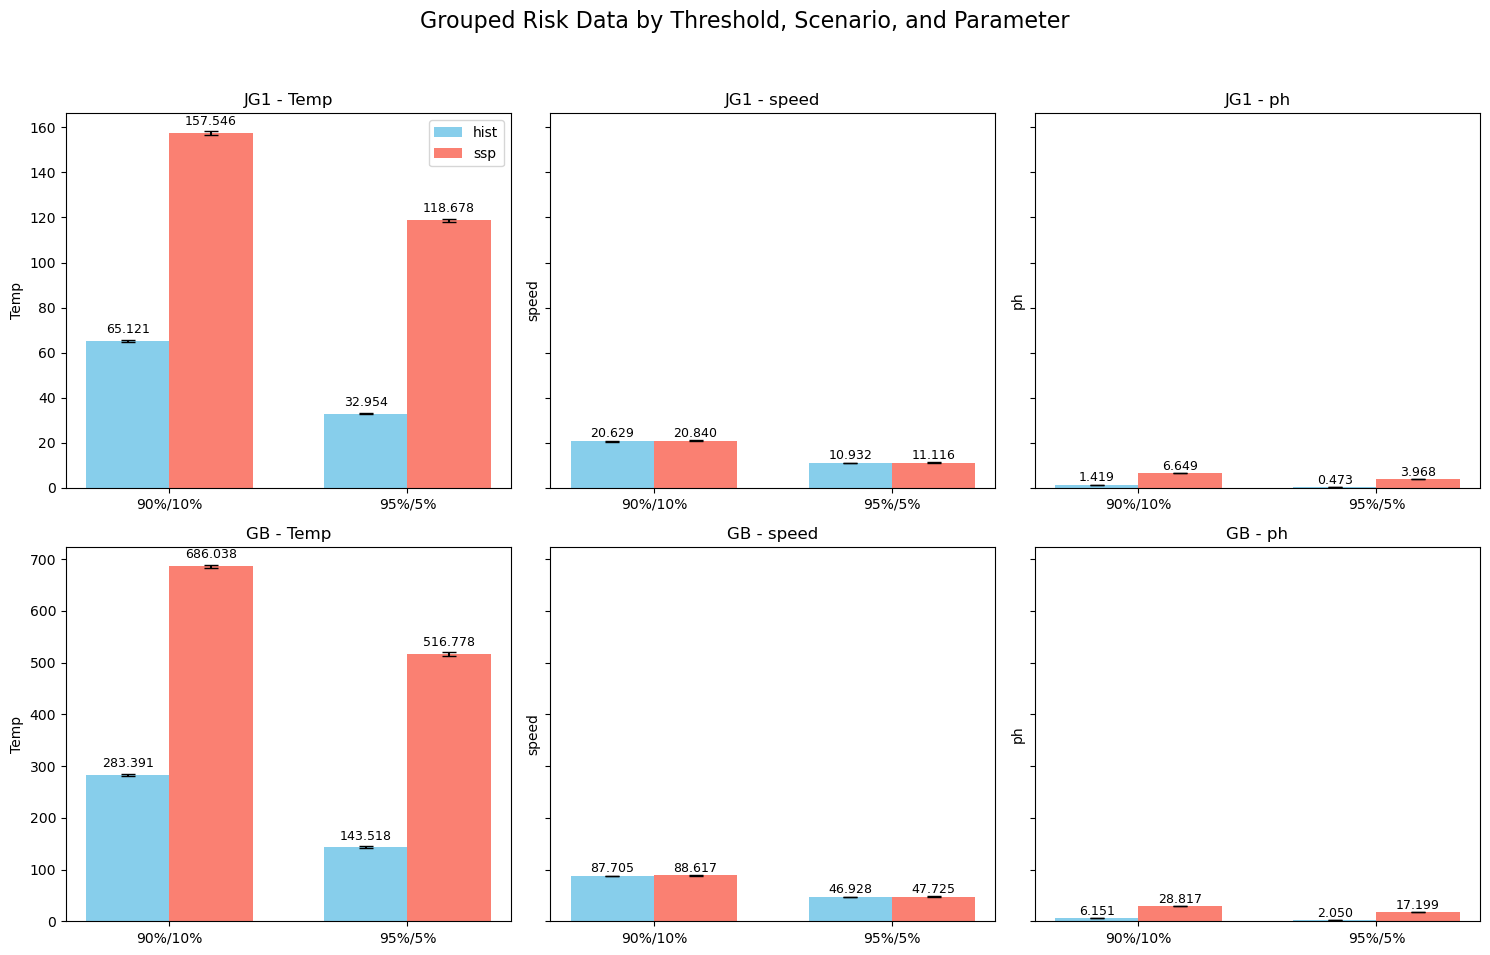

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Read risk data from file and rename columns to avoid duplicates
# ---------------------------
risk_file = "/lfs/home/ioloi/lfs_dir/project_UCH/03_csv/UCH_RiskData_risk.0406.csv"
df_risk = pd.read_csv(risk_file)

# The CSV file contains duplicate column names for CI.
# We rename the columns to have unique names:
# Expected order: Threshold, ship, Scenario, Temp, CI, speed, CI.1, ph, CI
# We'll rename them as follows:
df_risk.columns = ["Threshold", "ship", "Scenario", "Temp", "Temp_CI", "speed", "speed_CI", "ph", "ph_CI"]

print("Table 1 Information:")
print(df_risk.to_string(index=False))

# ---------------------------
# Define settings for plotting
# ---------------------------
ships = ["JG1", "GB"]
parameters = ["Temp", "speed", "ph"]
# Mapping each parameter to its corresponding CI column
error_cols = {"Temp": "Temp_CI", "speed": "speed_CI", "ph": "ph_CI"}
thresholds = ["90%/10%", "95%/5%"]
scenarios = ["hist", "ssp"]

# Create a 2x3 grid: rows for ships; columns for parameters
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey='row')

# Define bar width and x positions for threshold groups
width = 0.35
x = np.arange(len(thresholds))  # positions for the two threshold groups

# ---------------------------
# Loop over each ship and parameter to create grouped bar charts with error bars
# ---------------------------
for i, ship in enumerate(ships):
    # Filter data for the current ship
    df_ship = df_risk[df_risk["ship"] == ship]
    for j, param in enumerate(parameters):
        ax = axs[i, j]
        # Pivot the data: rows = Threshold, columns = Scenario, values = parameter
        pivot = df_ship.pivot_table(index="Threshold", columns="Scenario", values=param, aggfunc="mean")
        # Pivot the data for the error (CI) values
        err_col = error_cols[param]
        pivot_err = df_ship.pivot_table(index="Threshold", columns="Scenario", values=err_col, aggfunc="mean")
        
        # Extract values for 'hist' and 'ssp' in the specified threshold order
        hist_vals = [pivot.loc[thr, "hist"] for thr in thresholds]
        ssp_vals  = [pivot.loc[thr, "ssp"] for thr in thresholds]
        # Extract the corresponding error values
        hist_errs = [pivot_err.loc[thr, "hist"] for thr in thresholds]
        ssp_errs  = [pivot_err.loc[thr, "ssp"] for thr in thresholds]
        
        # Plot bars with error bars: left bars for "hist" and right bars for "ssp"
        bars_hist = ax.bar(x - width/2, hist_vals, width, yerr=hist_errs, capsize=5,
                           label="hist", color="skyblue")
        bars_ssp  = ax.bar(x + width/2, ssp_vals, width, yerr=ssp_errs, capsize=5,
                           label="ssp", color="salmon")
        
        # Set x-axis ticks and labels for threshold groups
        ax.set_xticks(x)
        ax.set_xticklabels(thresholds)
        ax.set_title(f"{ship} - {param}")
        ax.set_ylabel(param)
        
        # Annotate each bar with its numeric value (formatted to three decimals)
        # The annotation is placed just above the top of the error bar
        for k in range(len(x)):
            ax.text(x[k] - width/2, hist_vals[k] + hist_errs[k] + 0.01 * max(hist_vals + ssp_vals),
                    f"{hist_vals[k]:.3f}", ha="center", va="bottom", fontsize=9)
            ax.text(x[k] + width/2, ssp_vals[k] + ssp_errs[k] + 0.01 * max(hist_vals + ssp_vals),
                    f"{ssp_vals[k]:.3f}", ha="center", va="bottom", fontsize=9)
        
        # Add legend only for the first subplot to avoid redundancy
        if i == 0 and j == 0:
            ax.legend()

plt.suptitle("Grouped Risk Data by Threshold, Scenario, and Parameter", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Table 1 Information:
Threshold ship Scenario       Temp  Temp_CI     speed  speed_CI        ph    ph_CI
  90%/10%  JG1     hist  69.851103 0.535582 22.127972  0.169131  1.522179 0.028188
   95%/5%  JG1     hist  35.348379 0.422828 11.726416  0.140942  0.507393 0.000000
  90%/10%  JG1      ssp 168.990058 0.817466 22.353480  0.169131  7.131691 0.056377
   95%/5%  JG1      ssp 127.299266 0.732901 11.923735  0.140942  4.256463 0.028188
  90%/10%   GB     hist 283.390664 2.278060 87.705310  0.683418  6.150762 0.113903
   95%/5%   GB     hist 143.517780 1.708545 46.928036  0.569515  2.050254 0.000000
  90%/10%   GB      ssp 686.037769 3.530993 88.616534  0.683418 28.817459 0.227806
   95%/5%   GB      ssp 516.777911 2.961478 47.725357  0.569515 17.199353 0.113903


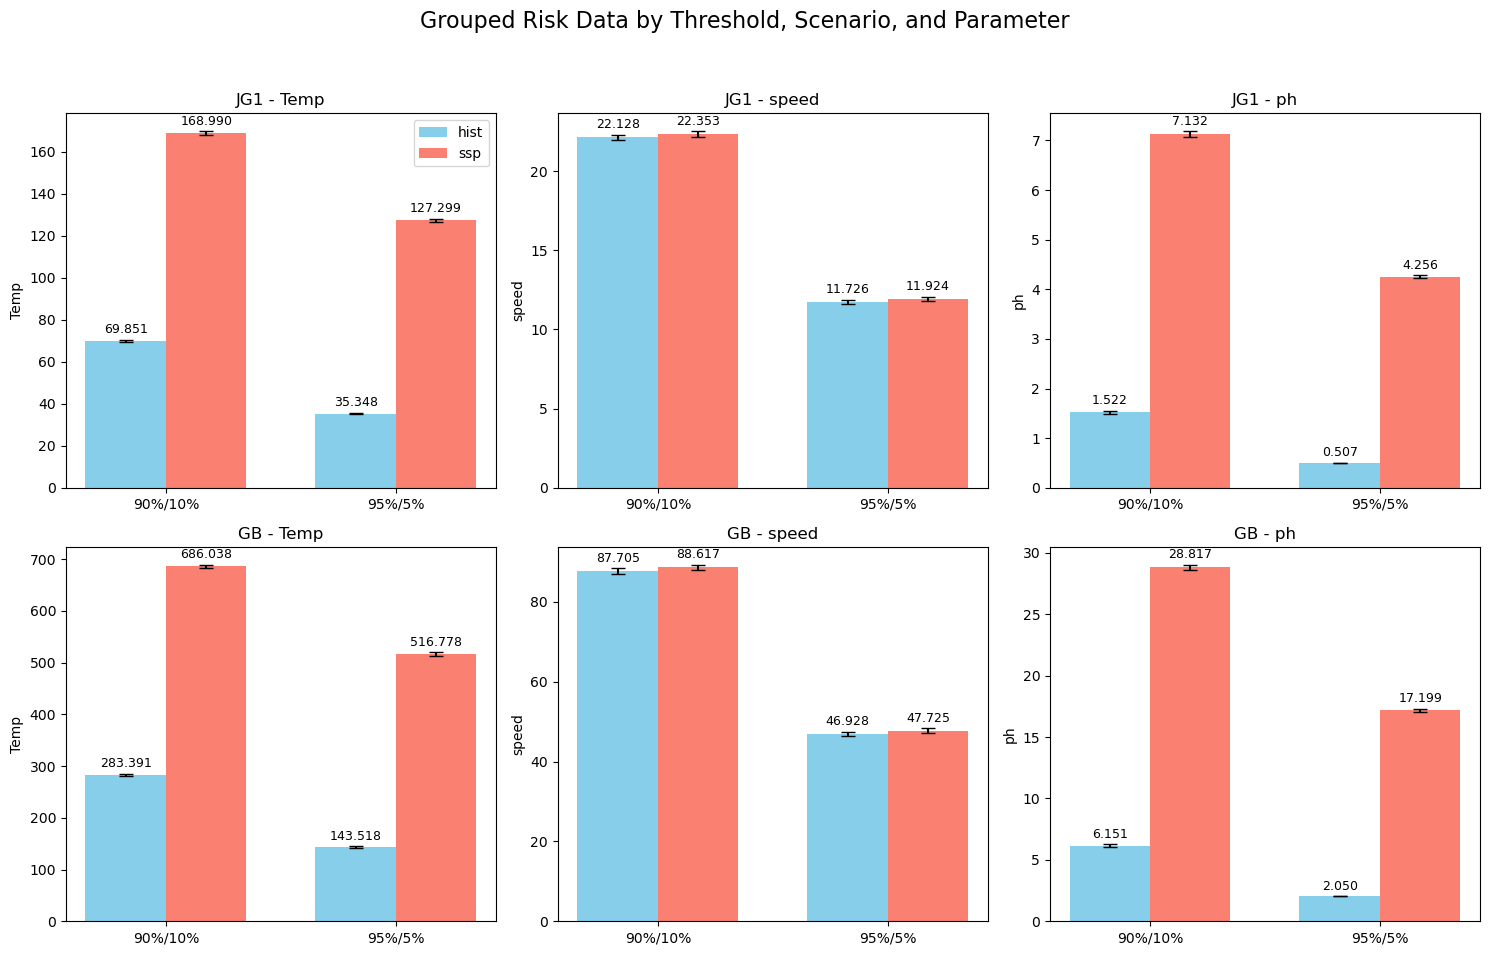

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Read risk data from file and rename columns to avoid duplicates
# ---------------------------
risk_file = "/lfs/home/ioloi/lfs_dir/project_UCH/03_csv/UCH_RiskData_risk.0406.csv"
df_risk = pd.read_csv(risk_file)

# Rename columns to have unique names:
# Expected order: Threshold, ship, Scenario, Temp, CI, speed, CI.1, ph, CI
# We'll rename them as follows:
df_risk.columns = ["Threshold", "ship", "Scenario", "Temp", "Temp_CI", "speed", "speed_CI", "ph", "ph_CI"]

print("Table 1 Information:")
print(df_risk.to_string(index=False))

# ---------------------------
# Define settings for plotting
# ---------------------------
ships = ["JG1", "GB"]
parameters = ["Temp", "speed", "ph"]
# Mapping each parameter to its corresponding CI column
error_cols = {"Temp": "Temp_CI", "speed": "speed_CI", "ph": "ph_CI"}
thresholds = ["90%/10%", "95%/5%"]
scenarios = ["hist", "ssp"]

# Create a 2x3 grid: rows for ships; columns for parameters
# Remove sharey so that each panel has its own y-axis scale.
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Define bar width and x positions for threshold groups
width = 0.35
x = np.arange(len(thresholds))  # positions for the two threshold groups

# ---------------------------
# Loop over each ship and parameter to create grouped bar charts with error bars
# ---------------------------
for i, ship in enumerate(ships):
    # Filter data for the current ship
    df_ship = df_risk[df_risk["ship"] == ship]
    for j, param in enumerate(parameters):
        ax = axs[i, j]
        # Create a pivot table: rows = Threshold, columns = Scenario, values = parameter mean
        pivot = df_ship.pivot_table(index="Threshold", columns="Scenario", values=param, aggfunc="mean")
        # Create a pivot table for the corresponding CI values
        err_col = error_cols[param]
        pivot_err = df_ship.pivot_table(index="Threshold", columns="Scenario", values=err_col, aggfunc="mean")
        
        # Extract values for 'hist' and 'ssp' in the specified threshold order
        hist_vals = [pivot.loc[thr, "hist"] for thr in thresholds]
        ssp_vals  = [pivot.loc[thr, "ssp"] for thr in thresholds]
        # Extract the corresponding error values
        hist_errs = [pivot_err.loc[thr, "hist"] for thr in thresholds]
        ssp_errs  = [pivot_err.loc[thr, "ssp"] for thr in thresholds]
        
        # Plot bars with error bars: left bars for "hist" and right bars for "ssp"
        bars_hist = ax.bar(x - width/2, hist_vals, width, yerr=hist_errs, capsize=5,
                           label="hist", color="skyblue")
        bars_ssp  = ax.bar(x + width/2, ssp_vals, width, yerr=ssp_errs, capsize=5,
                           label="ssp", color="salmon")
        
        # Set x-axis ticks and labels for threshold groups
        ax.set_xticks(x)
        ax.set_xticklabels(thresholds)
        ax.set_title(f"{ship} - {param}")
        ax.set_ylabel(param)
        
        # Annotate each bar with its numeric value (formatted to three decimals)
        for k in range(len(x)):
            # Use a small offset above the top of each error bar
            ax.text(x[k] - width/2, hist_vals[k] + hist_errs[k] + 0.01 * max(hist_vals + ssp_vals),
                    f"{hist_vals[k]:.3f}", ha="center", va="bottom", fontsize=9)
            ax.text(x[k] + width/2, ssp_vals[k] + ssp_errs[k] + 0.01 * max(hist_vals + ssp_vals),
                    f"{ssp_vals[k]:.3f}", ha="center", va="bottom", fontsize=9)
        
        # Add legend only for the first subplot to avoid redundancy
        if i == 0 and j == 0:
            ax.legend()

plt.suptitle("Grouped Risk Data by Threshold, Scenario, and Parameter", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
